<a href="https://colab.research.google.com/github/Rahul21sai/DL_projects/blob/main/MNIST_Digit_classififcation_using.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import dependenices
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import tensorflow as tf
from google.colab.patches import cv2_imshow
from PIL import Image
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

loading mnist data from keras datasets

In [2]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [3]:
type(x_train)

numpy.ndarray

In [4]:
#shape
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [5]:
#image dimesion 28*28 gray scale
print(x_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [6]:
print(x_train[10].shape)

(28, 28)


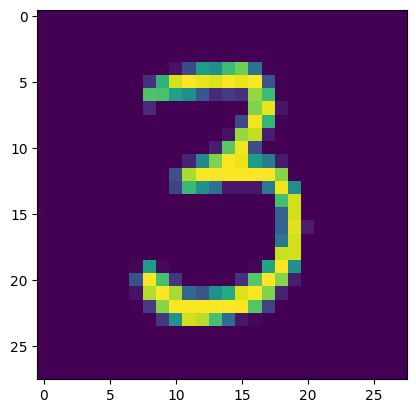

3


In [10]:
#displaying the image
plt.imshow(x_train[50])
plt.show()

#print the corresponding label
print(y_train[50])

In [11]:
#image labels
print(y_train.shape,y_test.shape)

(60000,) (10000,)


In [13]:
#uniquwe values train
print(np.unique(y_train))

[0 1 2 3 4 5 6 7 8 9]


In [14]:
print(np.unique(y_test))

[0 1 2 3 4 5 6 7 8 9]


In [17]:
#we can use these labels as such oer we can also apply one hot encoding
#all the images have same dimensions in this dataset if not resize all the images to common dimensions\
 # scaling the values
 #normslization
x_train = x_train/255
x_test = x_test/255

In [19]:
print(x_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

bulidng the neural network


In [20]:
#setting of layers for neural networks
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(50,activation = 'relu'),
    keras.layers.Dense(50,activation = 'relu'),
    keras.layers.Dense(10,activation = 'sigmoid')
])

In [21]:
#compiling the neural network

model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [22]:
#trainng the neural network
model.fit(x_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 2ms/step - loss: 0.2970 - accuracy: 0.9126
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1366 - accuracy: 0.9581
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1021 - accuracy: 0.9687
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0824 - accuracy: 0.9743
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0698 - accuracy: 0.9779
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0597 - accuracy: 0.9806
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0539 - accuracy: 0.9823
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0465 - accuracy: 0.9850
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0414 - accuracy: 0.9863
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.038

In [25]:
#accuracy on the test data
loss, accuracy = model.evaluate(x_test,y_test)
print(accuracy*100)

313/313 [==============================] - 1s 2ms/step - loss: 0.1050 - accuracy: 0.9710
97.10000157356262


In [26]:
print(x_test.shape)

(10000, 28, 28)


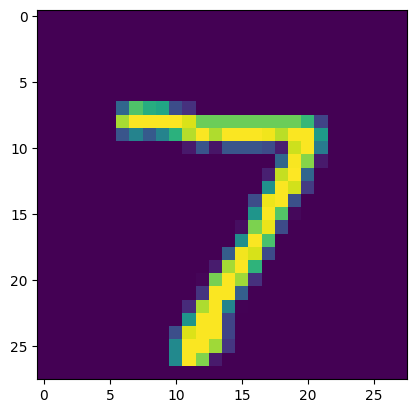

7


In [27]:
#first data point in x_test
plt.imshow(x_test[0])
plt.show()
print(y_test[0])

In [28]:
y_pred = model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [30]:
y_pred.shape

(10000, 10)

In [29]:
print(y_pred[0])

[6.2032475e-04 3.0979324e-02 1.2987980e-01 8.4164512e-01 3.4813279e-06
 3.2314509e-03 5.1399077e-08 9.9999869e-01 1.3068491e-01 3.9058819e-01]


model.predict() gives the predicition of each class for that data point

In [31]:
#converting the predicition probabblites to class labels
label_forfirsttestimage = np.argmax(y_pred[0])
print(label_forfirsttestimage)

7


In [33]:
##converting the predicition probabblites to class labels for all test data point
y_pred_labels = [np.argmax(i) for i in y_pred]
print(y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 2, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 5, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 9, 4, 4, 9, 2, 5, 4, 7, 6, 7, 4, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 0, 8, 5, 7, 7, 4, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

In [34]:
print(y_pred)

[[6.2032475e-04 3.0979324e-02 1.2987980e-01 ... 9.9999869e-01
  1.3068491e-01 3.9058819e-01]
 [8.2986236e-02 9.5717961e-01 9.9999994e-01 ... 8.5056467e-07
  5.4179454e-01 4.3238527e-03]
 [3.3956056e-03 9.9970818e-01 7.7065825e-02 ... 4.7782955e-01
  2.3748749e-01 3.8169266e-03]
 ...
 [1.7521144e-08 1.6318116e-02 8.8474508e-03 ... 3.4893465e-01
  9.6614920e-02 9.9965996e-01]
 [1.2451500e-06 4.2680986e-06 1.4682106e-08 ... 2.3730687e-05
  9.5511800e-01 4.0665040e-09]
 [5.4857899e-03 9.4076666e-09 7.7114999e-02 ... 4.9553574e-08
  1.2854813e-04 1.8772736e-10]]


y_test --> true labels
y_pred_labels -> predictedlabels

In [36]:
#confusion matrix
conf = confusion_matrix(y_test, y_pred_labels)

In [37]:
print(conf)

tf.Tensor(
[[ 962    0    2    0    2    4    4    3    2    1]
 [   0 1122    5    1    0    2    3    0    2    0]
 [   5    2  998    6    3    0    1    6   11    0]
 [   1    2    7  976    0    8    0    9    6    1]
 [   2    2    3    0  961    1    4    3    0    6]
 [   2    0    0    8    3  862    5    1    8    3]
 [   5    4    2    1    9    4  930    0    3    0]
 [   1    7   13    2    3    0    0  993    0    9]
 [   2    0    5    7    4   11    0    3  936    6]
 [   0    2    0    4   19    4    1    7    1  971]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'Predicted labels')

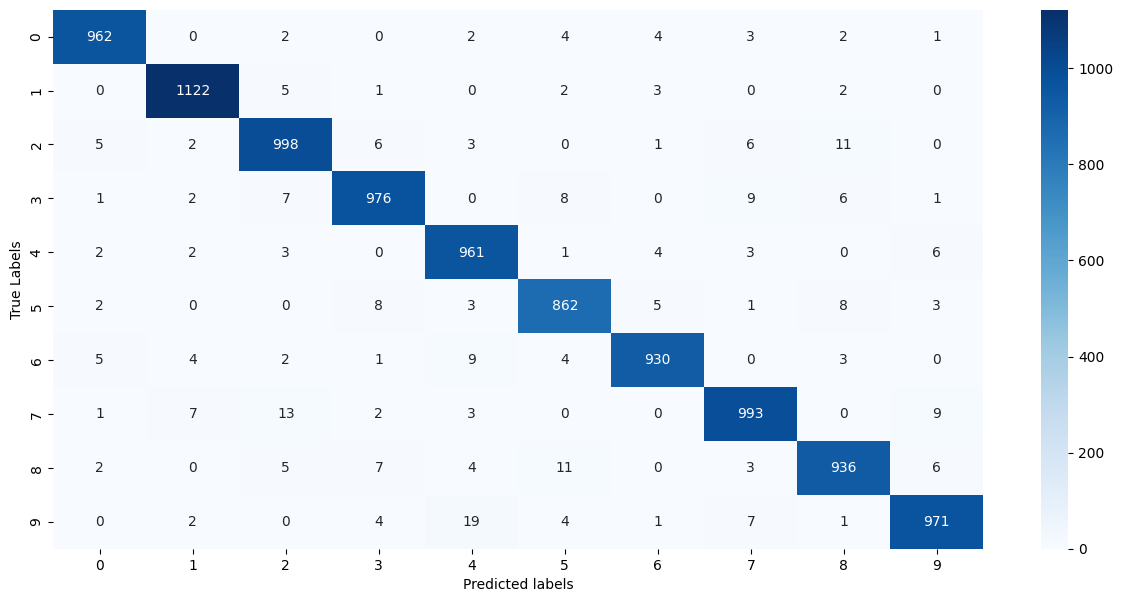

In [38]:
plt.figure(figsize=(15,7))
sns.heatmap(conf, annot = True, fmt = 'd',cmap = 'Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted labels')

In [39]:
#building the predictive system
imgpath = '/content/MNIST_digit.png'#link =https://drive.google.com/file/d/1EVCaDojfusFw2tlND86qLSjvZTjJzPyo/view

input_image = cv2.imread(imgpath)



In [41]:
type(input_image)

numpy.ndarray

In [42]:
print(input_image)

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


In [43]:
input_image.shape

(318, 318, 3)

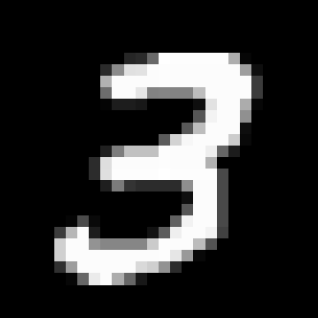

In [44]:
cv2_imshow(input_image)

In [46]:
#convert img to gray scsle
grayscale = cv2.cvtColor(input_image,cv2.COLOR_RGB2GRAY)

In [47]:
grayscale.shape


(318, 318)

In [48]:
#resize the image
resizeimage = cv2.resize(grayscale,(28,28))

In [49]:
resizeimage.shape

(28, 28)

In [50]:
cv2_imshow(resizeimage)

In [51]:
resizeimage = resizeimage/255

In [53]:
reshapeimg = np.reshape(resizeimage,[1,28,28])

In [54]:
imgpred = model.predict(reshapeimg)

1/1 [==============================] - 0s 44ms/step


In [55]:
print(imgpred)

[[3.1201302e-11 3.7933763e-03 4.8792087e-03 1.0000000e+00 4.1464353e-11
  7.0853300e-02 2.4025166e-14 3.6850446e-04 8.2407421e-01 2.0679297e-01]]


In [56]:
input_pred_label = np.argmax(imgpred)

In [57]:
print(input_pred_label)

3


**predicitve system**

path of the image to be predicted:/content/MNIST_digit.png
[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


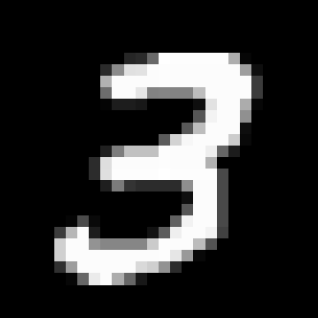

1/1 [==============================] - 0s 25ms/step
the handwritten digit is recognized as  3


In [58]:
imgpath = input("path of the image to be predicted:")
input_image = cv2.imread(imgpath)
print(input_image)
cv2_imshow(input_image)
#convert img to gray scsle
grayscale = cv2.cvtColor(input_image,cv2.COLOR_RGB2GRAY)
resizeimage = cv2.resize(grayscale,(28,28))
cv2_imshow(resizeimage)
resizeimage = resizeimage/255
reshapeimg = np.reshape(resizeimage,[1,28,28])
imgpred = model.predict(reshapeimg)
input_pred_label = np.argmax(imgpred)
print("the handwritten digit is recognized as ",input_pred_label)